In [ ]:
# I will use in this Kernel the step-by-step process of Will Koehrsen.
# I won't use everything, but most of them.
# This project at in GitHub repository: https://github.com/WillKoehrsen/machine-learning-project-walkthrough

In [52]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout , MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential, load_model

In [44]:
from tensorflow.keras.layers import Conv2D

In [1]:
# # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [4]:
# # # Data Cleaning and Formatting
# # Load in the Data and Examine
# Read in data into a dataframe 
data = pd.read_csv('./data/train_v2.csv')

c:\users\epsilon\dev\anaconda\envs\kera\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
data = data[:1000]

In [21]:
data

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,...,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,...,2.3451,0.030594,1.7418,1.5271,0.8474,0.4715,0.028362,3.1611,2.5162,2.0037,0.019636,4.4352,4.2676,-0.1524,1,-0.40,-0.560,-0.440,-0.6280,-3.14,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,7,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,0.6903,8.449459e+08,78,50,754416.0,78.0,78.0,78.00,78.00,78.0,...,1.5666,0.120442,1.1963,1.0322,0.4843,0.2389,0.130160,2.7659,1.9523,1.4059,0.115277,3.2763,2.7962,-0.3097,1,-0.17,-0.275,-0.203,-0.2300,-1.38,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,7,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,0.7807,1.308478e+09,89,54,1037651.0,89.0,89.0,100.43,94.37,89.0,...,4.5627,0.226336,3.3277,3.4166,1.8321,0.9979,0.103307,6.8623,5.2963,4.1282,0.219729,8.1381,7.3269,-0.1909,1,-0.58,-0.540,-0.572,-0.3985,-5.18,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,7,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,0.8158,1.472752e+09,93,55,1115721.0,93.0,93.0,114.63,102.92,93.0,...,1.6899,0.054630,1.3748,1.3421,0.7982,0.4810,0.081205,2.5571,2.0593,1.6653,0.056470,3.2516,3.0631,-0.1770,1,-0.75,-0.635,-0.745,-0.5100,-2.04,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,6,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,0.5455,1.442916e+09,60,21,536400.0,60.0,60.0,60.00,60.00,60.0,...,11.9179,0.085330,7.2175,6.2262,3.1446,1.6149,0.074286,15.9080,12.5688,9.9844,0.067540,17.5561,15.6079,-0.4444,1,-0.18,-0.280,-0.182,-0.4277,-11.12,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,134,10,0.207482,2200,3,78224,4053.0,5777.0,130.26,133.31,12,0.7177,0.7177,12182858,0.7236,0.7177,0.5312,0.7672,0.8558,0.7946,1.538124e+09,89,39,1005967.0,89.0,89.0,100.43,94.37,89.0,...,4.2077,0.095403,3.0684,2.4903,1.3712,0.7699,0.101971,5.7162,4.6401,3.8020,0.093630,6.4751,5.8878,-0.1442,1,-0.64,-0.450,-0.596,-0.3367,-3.03,9,1.55,-0.88,0.52,0.2426,-0.2225,1,0,7,0
996,997,134,10,0.437025,2200,3,13026,4579.0,5779.0,126.23,131.75,12,0.7750,0.7561,68565,0.7561,0.7500,0.4576,0.7686,0.8455,0.8304,1.653568e+09,93,30,942741.0,93.0,93.0,104.95,98.61,93.0,...,3.6791,0.042418,2.3645,1.9578,0.9194,0.4337,0.031757,5.3987,4.2013,3.2792,0.044338,5.9313,5.1816,-0.1545,1,-0.33,-0.315,-0.337,-0.3378,-3.04,9,1.33,-0.69,0.38,0.1835,-0.8651,1,0,7,0
997,998,140,10,0.114361,2200,3,78935,3459.0,2055.0,135.68,139.90,12,0.7840,0.7840,7442532,0.7840,0.7840,0.6878,0.7903,0.8991,0.8829,2.911453e+09,98,60,1354164.0,98.0,98.0,120.79,108.46,98.0,...,7.3226,0.077547,5.8112,4.6727,2.7004,1.5874,0.090871,10.1529,8.4465,7.0721,0.073485,12.4732,11.8180,-0.1009,1,-0.78,-0.650,-0.742,-0.5793,-8.69,15,5.99,-4.51,3.56,0.2524,0.6552,1,0,7,0
998,999,126,10,0.870565,2200,3,6901,1802.0,2566.0,127.46,126.29,12,0.0000,0.0000,1020448,0.0000,0.0000,0.6431,0.0000,0.0000,0.0000,1.226616e+09,0,54,645248.0,0.0,0.0,0.00,0.00,71.0,...,4.0733,0.216226,3.0956,3.1545,1.6621,0.9082,0.107685,6.5780,4.9688,3.7983,0.213190,9.3715,8.5472,-1.0000,1,-0.86,-0.590,-0.794,-0.3962,-5.15,13,3.29,-2.42,1.92,0.3101,-0.6885,1,0,7,0


In [7]:
data.info()
data.select_dtypes(include=['object']).head()
# Statistics for each column
data.describe()

In [22]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(data).head(50)

Your selected dataframe has 771 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
f206,24,2.4
f207,24,2.4
f390,5,0.5
f391,5,0.5
f626,5,0.5
f627,5,0.5
f695,5,0.5
f698,5,0.5
f137,4,0.4
f138,4,0.4


In [23]:
data.fillna(data.mean(), inplace=True)

In [24]:
missing_values_table(data).head(50)

Your selected dataframe has 771 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
f206,24,2.4
f207,24,2.4
f390,5,0.5
f391,5,0.5
f626,5,0.5
f627,5,0.5
f695,5,0.5
f698,5,0.5
f137,4,0.4
f138,4,0.4


In [25]:
data.dropna(inplace=True)
missing_values_table(data)

Your selected dataframe has 771 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [26]:
data.shape

(968, 771)

In [27]:
# # # Exploratory Data Analysis

for i in data.select_dtypes(include=['object']).columns:
    data.drop(labels=i, axis=1, inplace=True)

Text(0.5, 1.0, 'Loss Distribution')

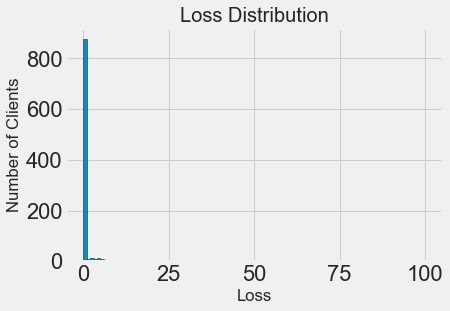

In [28]:
# # Single Variable Plots

figsize=(8, 8)

# Histogram of the loss
plt.style.use('fivethirtyeight')
plt.hist(data['loss'], bins = 100, edgecolor = 'k')
plt.xlabel('Loss') 
plt.ylabel('Number of Clients');
plt.title('Loss Distribution')

In [29]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = data.corr()['loss'].sort_values()

In [31]:
for i in data.columns:
    if len(set(data[i]))==1:
        data.drop(labels=[i], axis=1, inplace=True)

In [32]:
# Find all correlations and sort 
correlations_data = data.corr()['loss'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

f219   -0.123986
f533   -0.099642
f289   -0.076424
f509   -0.066568
f640   -0.063927
f432   -0.052848
f377   -0.049424
f376   -0.049075
f776   -0.048858
f25    -0.048360
f298   -0.047144
f373   -0.045418
f760   -0.044696
f356   -0.041893
f365   -0.041856
Name: loss, dtype: float64 

f404    0.043827
f357    0.044129
f766    0.044223
f142    0.044842
f260    0.047536
f183    0.050299
f67     0.053038
f153    0.056701
f566    0.058247
f516    0.063657
f229    0.067814
f230    0.077110
f556    0.219584
f536    0.258039
loss    1.000000
Name: loss, dtype: float64


In [33]:
# # # Feature Engineering and Selection
    
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between loss
    y = x['loss']
    x = x.drop(columns = ['loss'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['loss'] = y
               
    return x

In [34]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(data, 0.6);

In [ ]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = data.drop(columns='loss')
targets = pd.DataFrame(data['loss'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# # # Models to Evaluate

# We will compare five different machine learning Cassification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [ ]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

In [ ]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)